In [46]:
# Importing the Natural Language Toolkit (nltk) library
import nltk 

# Importing the regular expressions (re) library for text processing
import re 

# Importing the stopwords from the nltk.corpus module to filter out common words
from nltk.corpus import stopwords 

# Importing the pandas library for data manipulation and analysis
import pandas as pd 

# Importing the numpy library for numerical operations
import numpy as np 

# Importing the matplotlib.pyplot module for creating visualizations
import matplotlib.pyplot as plt 

# Importing the CountVectorizer from sklearn.feature_extraction.text to convert text into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

# Importing roc_curve and roc_auc_score from sklearn.metrics to evaluate the performance of a classification model
from sklearn.metrics import roc_curve, roc_auc_score

# Importing LogisticRegression from sklearn.linear_model for logistic regression modeling
from sklearn.linear_model import LogisticRegression

# Importing confusion_matrix and classification_report from sklearn.metrics for evaluating classification models
from sklearn.metrics import confusion_matrix, classification_report

# Importing seaborn for advanced data visualization
import seaborn as sns 

# Importing LabelEncoder from sklearn.preprocessing for encoding target labels with value between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder

# Importing accuracy_score and f1_score from sklearn.metrics for evaluating the performance of classification models
from sklearn.metrics import accuracy_score, f1_score


In [47]:
def read_csv(filepath):
    # This function reads a CSV file and returns a DataFrame.
    
    # Using pandas to read the CSV file located at 'filepath'
    data = pd.read_csv(filepath)
    
    # Returning the DataFrame containing the CSV data
    return data 


In [48]:
# Reading the 'true.csv' file and storing its content in a DataFrame named 'true'
true = read_csv('data/true.csv')

# Reading the 'fake.csv' file and storing its content in a DataFrame named 'fake'
fake = read_csv('data/fake.csv')


In [49]:
# Displaying the first five rows of the DataFrame 'true' to get an overview of the data
true.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [50]:
# Adding a new column 'target' to the 'true' DataFrame with the value 'true' for all rows
true['target'] = 'true'

# Adding a new column 'target' to the 'fake' DataFrame with the value 'fake' for all rows
fake['target'] = 'fake'


In [51]:
# Concatenating the 'true' and 'fake' DataFrames into a single DataFrame 'df'
# The ignore_index=True parameter ensures that the index is reset in the combined DataFrame
df = pd.concat([true, fake], ignore_index=True)


In [52]:
# Displaying the first five rows of the combined DataFrame 'df' to get an overview of the merged data
df.head()


,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [53]:
# Dropping the 'date', 'title', and 'subject' columns from the DataFrame 'df'
# The 'axis=1' parameter specifies that columns are to be dropped (axis=0 would drop rows)
# The 'inplace=True' parameter modifies the DataFrame in place without returning a new DataFrame
df.drop(labels=['date', 'title', 'subject'], axis=1, inplace=True)


In [54]:
# Splitting the DataFrame 'df' into training, validation, and test sets
# The 'sample' method is used to shuffle the DataFrame
# 'frac=1' indicates that all rows are to be sampled
# 'random_state=60' ensures that the shuffle is reproducible
# The 'np.split' function splits the shuffled DataFrame into three sets:
# - The first 65% of the data goes to the 'train' set
# - The next 30% of the data goes to the 'val' (validation) set
# - The remaining 5% of the data goes to the 'test' set
train, val, test = np.split(df.sample(frac=1, random_state=60), [int(len(df) * 0.65), int(len(df) * 0.95)])


/Users/mikosa/nlp/lib/python3.9/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [55]:
# Splitting the 'train' DataFrame into feature (x_train) and target (y_train) arrays
# 'x_train' contains the text data for training
# 'y_train' contains the target labels for training
x_train, y_train = train['text'].values, train['target'].values

# Splitting the 'val' (validation) DataFrame into feature (x_val) and target (y_val) arrays
# 'x_val' contains the text data for validation
# 'y_val' contains the target labels for validation
x_val, y_val = val['text'].values, val['target'].values

# Splitting the 'test' DataFrame into feature (x_test) and target (y_test) arrays
# 'x_test' contains the text data for testing
# 'y_test' contains the target labels for testing
x_test, y_test = test['text'].values, test['target'].values


In [56]:
# Compiling a regular expression pattern to replace specific characters with a space
REPLACE_BY_WORDS = re.compile('[/(){}\[\]\|@,;]')

# Compiling a regular expression pattern to remove any character that is not a lowercase letter or digit
BAD_WORDS = re.compile('[^0-9a-z]')

# Creating a set of English stopwords using NLTK
STOPWORDS = set(stopwords.words('english'))

def prepare_text(text):
    # Convert the text to lowercase
    text = text.lower()
    
    # Replace the specified characters with a space using the REPLACE_BY_WORDS pattern
    text = REPLACE_BY_WORDS.sub(' ', text)
    
    # Remove any character that is not a lowercase letter or digit using the BAD_WORDS pattern
    text = BAD_WORDS.sub(' ', text)
    
    # Remove stopwords and words with less than 3 characters, then join the remaining words with a space
    text = ' '.join(word for word in text.split() if word not in STOPWORDS and len(word) > 2)
    
    # Return the cleaned and processed text
    return text


In [57]:
# Applying the 'prepare_text' function to each element in 'x_train'
# This preprocesses the text data in the training set
x_train = [prepare_text(word) for word in x_train]

# Applying the 'prepare_text' function to each element in 'x_val'
# This preprocesses the text data in the validation set
x_val = [prepare_text(word) for word in x_val]

# Applying the 'prepare_text' function to each element in 'x_test'
# This preprocesses the text data in the test set
x_test = [prepare_text(word) for word in x_test]


In [58]:
# Displaying the third element (index 2) of the preprocessed training text data
x_train[2]


'probably looking safe space study protesters dartmouth university disrupted students studying library reportedly directing profanity towards white students physically pushing others critical editorial conservative dartmouth review listed epithets hurled protesters fuck filthy white fucks comfort racist shits addition review reports protesters became physically violent men women alike pushed shoved group shut cried another woman pinned wall protesters unleashed insults shouting filthy white bitch face campus reform managed obtain video showing protesters walking library shouting others try study one protesters seen flipping cameraman another gets face studying demanding say black lives matter one protesters posted online saying ashamed protest turned making girl cry protester screamed fuck white tears reports startled aggression small minority students towards students library many supporters movement watch via campus reform via mediaite'

In [59]:
# Initializing dictionaries to count occurrences of labels and words
label_count = {}
word_count = {}

# Counting the occurrences of each label in the training data
for text in y_train:
    if text in label_count:
        label_count[text] += 1
    else:
        label_count[text] = 1

# Counting the occurrences of each word in the training text data
for texts in x_train:
    for text in texts.split():
        if text in word_count:
            word_count[text] += 1
        else: 
            word_count[text] = 1

# Sorting the labels by their count in descending order
most_labels = sorted(label_count.items(), key=lambda x: x[1], reverse=True)

# Sorting the words by their count in descending order and taking the top 5
most_words  = sorted(word_count.items(), key=lambda x: x[1], reverse=True)[:5]

# Extracting the top labels
top_label = [label[0] for label in most_labels]

# Extracting the top words
top_words = [word[0] for word in most_words]

# Joining the top labels and top words into comma-separated strings
label_output = ", ".join(top_label)
word_output = ', '.join(top_words)

# Printing the top words and labels
print(f'Top words: {word_output}')
print(f"Top Labels: {label_output}")


Top words: trump, said, president, would, people
Top Labels: fake, true


In [60]:
def countvectorizer(x_train, x_val, x_test):
    # Creating an instance of CountVectorizer with specific parameters:
    # - min_df=0.10: Ignore terms that appear in less than 10% of the documents
    # - max_df=0.90: Ignore terms that appear in more than 90% of the documents
    # - ngram_range=(1, 3): Include unigrams, bigrams, and trigrams
    # - token_pattern=r'\b\w+\b': Token pattern to identify tokens (words)
    countvector = CountVectorizer(min_df=0.10, max_df=0.90, ngram_range=(1, 3), 
                                  token_pattern=r'\b\w+\b').fit(x_train)
    
    # Transforming the training text data into a document-term matrix
    x_train_count = countvector.transform(x_train)
    
    # Transforming the validation text data into a document-term matrix
    x_val_count = countvector.transform(x_val)
    
    # Transforming the test text data into a document-term matrix
    x_test_count = countvector.transform(x_test)

    # Returning the transformed data for training, validation, and test sets,
    # along with the vocabulary learned by the CountVectorizer
    return x_train_count, x_val_count, x_test_count, countvector.vocabulary_


In [61]:
# Applying the 'countvectorizer' function to the training, validation, and test text data
# This converts the text data into document-term matrices and retrieves the learned vocabulary
x_train_count, x_val_count, x_test_count, countvec_vocab = countvectorizer(x_train, x_val, x_test)


In [62]:
# Creating a dictionary that maps indices to words based on the learned vocabulary
# This reverses the 'countvec_vocab' dictionary where the key-value pairs are swapped
count_reverse_vocab = {i: word for word, i in countvec_vocab.items()}

# Printing the reversed vocabulary dictionary to see the mapping of indices to words
print(count_reverse_vocab)


{162: 'reuters', 151: 'president', 49: 'donald', 198: 'trump', 166: 'said', 201: 'twitter', 171: 'security', 52: 'election', 62: 'first', 66: 'friday', 192: 'time', 224: 'work', 44: 'deal', 26: 'came', 109: 'many', 187: 'things', 1: '2016', 154: 'presidential', 5: 'already', 3: 'added', 121: 'move', 225: 'working', 165: 'russia', 160: 'republican', 175: 'senator', 168: 'saying', 176: 'several', 220: 'whether', 27: 'campaign', 135: 'officials', 167: 'say', 169: 'says', 42: 'day', 152: 'president donald', 50: 'donald trump', 153: 'president donald trump', 212: 'washington', 203: 'united', 182: 'states', 30: 'change', 178: 'since', 200: 'tuesday', 184: 'support', 25: 'called', 46: 'democratic', 17: 'barack', 132: 'obama', 65: 'four', 228: 'year', 2: 'according', 85: 'international', 147: 'policy', 195: 'told', 43: 'days', 170: 'secretary', 180: 'state', 128: 'new', 4: 'administration', 227: 'would', 39: 'could', 133: 'office', 40: 'country', 229: 'years', 13: 'around', 131: 'next', 138: '

In [63]:
sorted(label_count.keys())

['fake', 'true']

In [64]:
# Creating an instance of LabelEncoder for encoding target labels
label_enc = LabelEncoder()

# Fitting the LabelEncoder to the sorted unique labels in the training data
label_enc.fit(sorted(label_count.keys()))

# Transforming the training target labels into numerical format
y_train_enc = label_enc.transform(y_train)

# Transforming the validation target labels into numerical format
y_val_enc = label_enc.transform(y_val)

# Transforming the test target labels into numerical format
y_test_enc = label_enc.transform(y_test)


In [65]:
def classifier(x_train, y_train):
    # Creating an instance of LogisticRegression
    logreg = LogisticRegression()
    
    # Fitting the logistic regression model to the training data
    logreg.fit(x_train, y_train)
    
    # Returning the trained logistic regression model
    return logreg


In [66]:
# Training the logistic regression classifier using the transformed training data and encoded labels
logreg = classifier(x_train_count, y_train_enc)

# Predicting the labels for the validation set using the trained logistic regression model
y_val_pred = logreg.predict(x_val_count)

# Getting the decision scores for the validation set, which indicate the confidence of the predictions
y_val_score = logreg.decision_function(x_val_count)


In [67]:
# Inversely transforming the predicted numerical labels back to their original categorical form
y_val_pred_inv = label_enc.inverse_transform(y_val_pred)

# Inversely transforming the actual encoded validation labels back to their original categorical form
y_val_inv = label_enc.inverse_transform(y_val_enc)


In [68]:
# Loop through the first four entries of the validation set.
for i in range(10): 
    # Print the text data, true label, and predicted label for each entry.
    # This format makes it easy to visually compare the predicted labels with the true labels.
    print('Text:\t{}\n True label:\t {}\n Predicted label:\t{}\n\n'\
          .format(x_val[i], y_val_inv[i], y_val_pred_inv[i]))

Text:	reuters president elect donald trump formally named former georgia governor sonny perdue nominee secretary agriculture thursday officially completing selection cabinet transition team said statement list republican trump selections top jobs administration note senate confirmation required posts except national security adviser white house posts tillerson spent entire career exxon mobil corp rose chairman chief executive officer 2006 civil engineer training texan joined world largest publicly traded energy company 1975 led several operations united states well yemen thailand russia exxon chief executive maintained close ties moscow opposed sanctions russia incursion crimea mnuchin successful private equity investor hedge fund manager hollywood financier spent years goldman sachs group inc leaving investment bank 2002 assembled investor group buy failed california mortgage lender 2009 rebranded onewest bank built southern california largest bank housing advocacy groups criticized o

In [69]:
def print_evaluation_scores(y_val, predicted):
    # Print the accuracy of the predictions: the proportion of the total number of predictions that were correct.
    print(f"Accuracy Score: {accuracy_score(y_val, predicted)}")
    
    # Print the F1 score using 'macro' averaging:
    # Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
    print(f"F1 Score(Macro): {f1_score(y_val, predicted, average='macro')}")
    
    # Print the F1 score using 'micro' averaging:
    # Calculate metrics globally by counting the total true positives, false negatives, and false positives.
    print(f"F1 Score(Micro): {f1_score(y_val, predicted, average='micro')}")
    
    # Print the F1 score using 'weighted' averaging:
    # Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label).
    print(f"F1 Score(Weighted): {f1_score(y_val, predicted, average='weighted')}")

In [70]:
# Assuming y_val and y_val_pred are already defined:
print_evaluation_scores(y_val_enc, y_val_pred)

Accuracy Score: 0.9938381588715665
F1 Score(Macro): 0.9938314869220609
F1 Score(Micro): 0.9938381588715665
F1 Score(Weighted): 0.9938384149057461


In [71]:
# Assuming y_val and y_val_pred are already defined:
print_evaluation_scores(y_train_enc, logreg.predict(x_train_count))

Accuracy Score: 0.9948942877702772
F1 Score(Macro): 0.9948807268770772
F1 Score(Micro): 0.9948942877702772
F1 Score(Weighted): 0.9948946398840154


In [72]:
# Assuming y_val and y_val_pred are already defined:
print_evaluation_scores(y_test_enc, logreg.predict(x_test_count))

Accuracy Score: 0.9919821826280624
F1 Score(Macro): 0.9919758636520324
F1 Score(Micro): 0.9919821826280624
F1 Score(Weighted): 0.9919821826280624


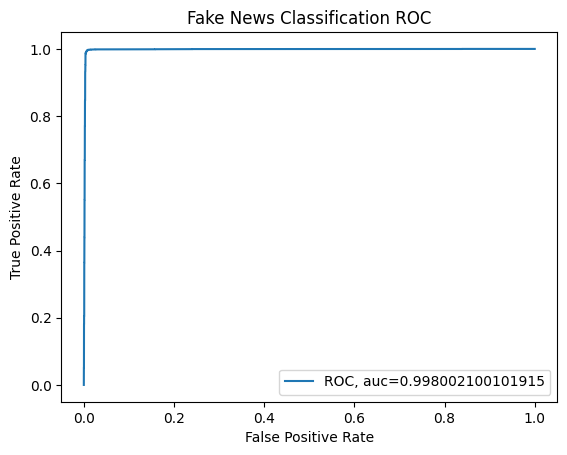

In [73]:

# Predicting probabilities for the positive class (AI) using the trained classifier
y_pred_proba = logreg.predict_proba(x_val_count)[:, 1]

# Calculating the false positive rate (fpr) and true positive rate (tpr) for the ROC curve
fpr, tpr, _ = roc_curve(y_val_enc, y_pred_proba)

# Calculating the area under the ROC curve (AUC)
auc = roc_auc_score(y_val_enc, y_pred_proba)

# Plotting the ROC curve
plt.plot(fpr, tpr, label="ROC, auc=" + str(auc))
plt.title('Fake News Classification ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

<Axes: >

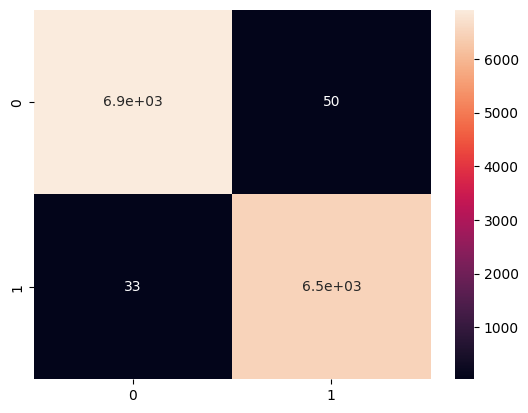

In [74]:
conf = confusion_matrix(y_val_enc, y_val_pred)

sns.heatmap(conf, annot= True)